In [1]:
####################
# importing packages
####################
import matplotlib.pyplot as plt                        # data visualization
import pandas as pd                                    # data science essentials
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


##########################################
# loading data and setting display options
##########################################
# loading data
chef_df = pd.read_excel('Apprentice_Chef_Dataset_Rich.xlsx') # including features engineer from 1st analysis


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

chef_df # checking the dataframe result


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,ln_REVENUE,ln_TOTAL_PHOTOS_VIEWED,ln_UNIQUE_MEALS_PURCH,ln_AVG_PREP_VID_TIME,ln_TOTAL_MEALS_ORDERED,tre_AVG_CLICKS_PER_VISIT,tre_LARGEST_ORDER_SIZE,tre_MEDIAN_MEAL_RATING,tre_CONTACTS_W_CUSTOMER_SERVICE,SOME,SINGLE_MEAL
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,5.973810,0.000000,1.791759,3.508556,2.639057,1,0,0,1,0,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,7.218910,5.135798,1.098612,4.440296,4.465908,1,0,0,0,1,0
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,6.684612,0.000000,1.945910,4.143135,2.708050,1,0,0,1,1,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,6.396930,0.000000,1.791759,3.779634,2.564949,1,0,0,1,1,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,7.306531,5.323010,2.079442,4.440296,3.850148,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,3450.0,0,Obara Sand,obara.sand@yahoo.com,Obara,Sand,87,8,8,7,108.90,1,0,0,1,6,1,6,0,3,0,0,212.5,10,2,3,11,0,8.146130,0.000000,2.079442,5.358942,4.465908,0,1,0,0,1,0
1942,5829.0,0,Quentyn Blackwood,quentyn.blackwood@yahoo.com,Quentyn,Blackwood,244,4,7,2,133.91,1,1,2,1,5,1,13,0,3,0,0,282.2,10,1,4,10,424,8.670601,6.049733,1.386294,5.642616,5.497168,0,1,1,0,1,0
1943,1900.0,0,Rhonda Rowan,rhonda.rowan@gmail.com,Rhonda,Rowan,57,2,8,4,102.71,1,2,0,1,6,1,11,3,7,0,0,254.4,10,0,4,12,480,7.549609,6.173786,0.693147,5.538908,4.043051,1,1,1,0,1,0
1944,1600.0,0,Turnip,turnip@yahoo.com,Turnip,Turnip,74,3,10,10,638.87,0,0,0,1,5,2,5,0,3,0,0,564.2,10,3,3,11,796,7.377759,6.679599,1.098612,6.335409,4.304065,0,1,0,0,1,0


In [2]:
#################
# splitting email
#################

# creating a placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef_df.iterrows():
    split_email = chef_df.loc[index, 'EMAIL'].split(sep = '@')
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# renaming column to concatenate
email_df.columns = ['id' , 'email_domain']

# concatenating personal_email_domain with Chef dataframe
chef_df = pd.concat([chef_df, email_df['email_domain']], axis = 1)


# setting condition for professional email domain
professional_email_domains = ['@mmm.com',
                              '@amex.com',
                              '@apple.com',
                              '@boeing.com',
                              '@caterpillar.com',
                              '@chevron.com',
                              '@cisco.com',
                              '@cocacola.com',
                              '@disney.com',
                              '@dupont.com',
                              '@exxon.com',
                              '@ge.org',
                              '@goldmansacs.com',
                              '@homedepot.com',
                              '@ibm.com',
                              '@intel.com',
                              '@jnj.com',
                              '@jpmorgan.com',
                              '@mcdonalds.com',
                              '@merck.com',
                              '@microsoft.com',
                              '@nike.com',
                              '@pfizer.com',
                              '@pg.com',
                              '@travelers.com',
                              '@unitedtech.com',
                              '@unitedhealth.com',
                              '@verizon.com',
                              '@visa.com',
                              '@walmart.com']
 
# setting condition for personal email domain    
personal_email_domains  = ['@gmail.com',
                           '@yahoo.com',
                           '@protonmail.com']

# setting condition for junk email domain
junk_email_domains  = ['@me.com',
                       '@aol.com',
                       '@hotmail.com',
                       '@live.com',
                       '@msn.com',
                       '@passport.com']

# creating placeholder
domain_group_lst=[]

# looping email domain to conditions
for domain in chef_df['email_domain']:
    if '@' + domain in professional_email_domains:
        domain_group_lst.append('professional_email')
        
    elif '@' + domain in personal_email_domains:
        domain_group_lst.append('personal_email')
    
    elif '@' + domain in junk_email_domains:
        domain_group_lst.append('junk_email')
    
    else:
        print('Unknown')

chef_df['domain_group'] = pd.Series(domain_group_lst)

In [3]:
# one hot encoding variables for creating dummy
one_hot_domain_group = pd.get_dummies(chef_df['domain_group'])

# joining new variables to dataframe
chef_df = chef_df.join([one_hot_domain_group])

chef_df # checking result of additional dummy columns

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,ln_REVENUE,ln_TOTAL_PHOTOS_VIEWED,ln_UNIQUE_MEALS_PURCH,ln_AVG_PREP_VID_TIME,ln_TOTAL_MEALS_ORDERED,tre_AVG_CLICKS_PER_VISIT,tre_LARGEST_ORDER_SIZE,tre_MEDIAN_MEAL_RATING,tre_CONTACTS_W_CUSTOMER_SERVICE,SOME,SINGLE_MEAL,email_domain,domain_group,junk_email,personal_email,professional_email
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,5.973810,0.000000,1.791759,3.508556,2.639057,1,0,0,1,0,0,unitedhealth.com,professional_email,0,0,1
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,7.218910,5.135798,1.098612,4.440296,4.465908,1,0,0,0,1,0,ge.org,professional_email,0,0,1
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,6.684612,0.000000,1.945910,4.143135,2.708050,1,0,0,1,1,0,jnj.com,professional_email,0,0,1
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,6.396930,0.000000,1.791759,3.779634,2.564949,1,0,0,1,1,0,ge.org,professional_email,0,0,1
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,7.306531,5.323010,2.079442,4.440296,3.850148,1,0,0,0,1,0,jnj.com,professional_email,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,3450.0,0,Obara Sand,obara.sand@yahoo.com,Obara,Sand,87,8,8,7,108.90,1,0,0,1,6,1,6,0,3,0,0,212.5,10,2,3,11,0,8.146130,0.000000,2.079442,5.358942,4.465908,0,1,0,0,1,0,yahoo.com,personal_email,0,1,0
1942,5829.0,0,Quentyn Blackwood,quentyn.blackwood@yahoo.com,Quentyn,Blackwood,244,4,7,2,133.91,1,1,2,1,5,1,13,0,3,0,0,282.2,10,1,4,10,424,8.670601,6.049733,1.386294,5.642616,5.497168,0,1,1,0,1,0,yahoo.com,personal_email,0,1,0
1943,1900.0,0,Rhonda Rowan,rhonda.rowan@gmail.com,Rhonda,Rowan,57,2,8,4,102.71,1,2,0,1,6,1,11,3,7,0,0,254.4,10,0,4,12,480,7.549609,6.173786,0.693147,5.538908,4.043051,1,1,1,0,1,0,gmail.com,personal_email,0,1,0
1944,1600.0,0,Turnip,turnip@yahoo.com,Turnip,Turnip,74,3,10,10,638.87,0,0,0,1,5,2,5,0,3,0,0,564.2,10,3,3,11,796,7.377759,6.679599,1.098612,6.335409,4.304065,0,1,0,0,1,0,yahoo.com,personal_email,0,1,0


In [4]:
df_corr = chef_df.corr(method = "pearson").round(decimals = 2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS                 1.00
professional_email                 0.19
CANCELLATIONS_BEFORE_NOON          0.16
MOBILE_NUMBER                      0.10
TASTES_AND_PREFERENCES             0.08
REFRIGERATED_LOCKER                0.07
CONTACTS_W_CUSTOMER_SERVICE        0.04
PC_LOGINS                          0.04
PACKAGE_LOCKER                     0.04
personal_email                     0.04
MASTER_CLASSES_ATTENDED            0.04
MEDIAN_MEAL_RATING                 0.03
AVG_PREP_VID_TIME                  0.03
ln_AVG_PREP_VID_TIME               0.03
tre_MEDIAN_MEAL_RATING             0.02
LARGEST_ORDER_SIZE                 0.02
ln_TOTAL_MEALS_ORDERED             0.02
EARLY_DELIVERIES                   0.02
ln_REVENUE                         0.01
TOTAL_MEALS_ORDERED                0.01
ln_TOTAL_PHOTOS_VIEWED             0.01
ln_UNIQUE_MEALS_PURCH              0.01
LATE_DELIVERIES                    0.01
TOTAL_PHOTOS_VIEWED                0.01
AVG_TIME_PER_SITE_VISIT            0.01


In [5]:
##################################
# create explanatory variable sets
##################################
candidate_dict = {

 # significant variable with feature engineers
 'logit_ori'   : ['REVENUE', 'TOTAL_MEALS_ORDERED' , 'UNIQUE_MEALS_PURCH' , 'CONTACTS_W_CUSTOMER_SERVICE' ,
                 'PRODUCT_CATEGORIES_VIEWED' , 'AVG_TIME_PER_SITE_VISIT' , 'MOBILE_NUMBER' , 'CANCELLATIONS_BEFORE_NOON' ,
                  'CANCELLATIONS_AFTER_NOON' , 'TASTES_AND_PREFERENCES' , 'PC_LOGINS' , 'MOBILE_LOGINS' , 'WEEKLY_PLAN' , 
                  'EARLY_DELIVERIES' , 'LATE_DELIVERIES' , 'EARLY_DELIVERIES' , 'PACKAGE_LOCKER' , 'MEDIAN_MEAL_RATING' , 'AVG_CLICKS_PER_VISIT' , 
                  'REFRIGERATED_LOCKER' , 'AVG_PREP_VID_TIME' , 'LARGEST_ORDER_SIZE' , 'MASTER_CLASSES_ATTENDED' , 'TOTAL_PHOTOS_VIEWED'],   

 
 # significant variables with lowcoef
 'logit_lowcoef'    : ['REVENUE' , 'TOTAL_MEALS_ORDERED' , 'PRODUCT_CATEGORIES_VIEWED' ,
                       'CANCELLATIONS_AFTER_NOON' , 'MOBILE_LOGINS' , 'LARGEST_ORDER_SIZE' , 
                       'AVG_CLICKS_PER_VISIT' , 'TOTAL_PHOTOS_VIEWED' , 'SOME' , 'SINGLE_MEAL' , 
                       'junk_email' , 'personal_email' , 'professional_email'],
 
    
 # significant variables based on p-value less than 0.05 
 'logit_pvalue'  : ['MOBILE_NUMBER' , 'CANCELLATIONS_BEFORE_NOON' , 'TASTES_AND_PREFERENCES' ,
                    'PC_LOGINS' , 'EARLY_DELIVERIES'], 

    
 # significant variables with low correlation
 'logit_lowcorr'  : ['UNIQUE_MEALS_PURCH' , 'PRODUCT_CATEGORIES_VIEWED' , 'REVENUE' , 
                     'tre_CONTACTS_W_CUSTOMER_SERVICE' , 
                     'CANCELLATIONS_AFTER_NOON' , 'MOBILE_LOGINS' , 'junk_email']    
}

In [6]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Original Dataset Model:
-----------
{candidate_dict['logit_ori']}


Low Coef Model:
--------------------------------
{candidate_dict['logit_lowcoef']}


Significant p-value Model:
---------------------------------
{candidate_dict['logit_pvalue']}


Low Correlation Model:
--------------------------------
{candidate_dict['logit_lowcorr']}

""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Original Dataset Model:
-----------
['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'EARLY_DELIVERIES', 'PACKAGE_LOCKER', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'TOTAL_PHOTOS_VIEWED']


Low Coef Model:
--------------------------------
['REVENUE', 'TOTAL_MEALS_ORDERED', 'PRODUCT_CATEGORIES_VIEWED', 'CANCELLATIONS_AFTER_NOON', 'MOBILE_LOGINS', 'LARGEST_ORDER_SIZE', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'SOME', 'SINGLE_MEAL', 'junk_email', 'personal_email', 'professional_email']


Significant p-value Model:
------------

In [7]:
##########################
# plot_feature_importances
##########################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [8]:
# train/test split with the logit_ori variables as it shows the best result compare to other dictionary variables
chef_data   =  chef_df.loc[ : , candidate_dict['logit_lowcorr']]
chef_target =  chef_df.loc[ : , 'CROSS_SELL_SUCCESS']


# create train/test split
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)

In [9]:
#####################
# random forest model
#####################

# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 7,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [10]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))


# saving scoring data for future use
rf_default_train_score = rf_default_fit.score(x_train, y_train).round(4) # accuracy
rf_default_test_score  = rf_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
rf_default_fit_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = rf_default_fit_pred).round(4)

Training ACCURACY: 0.78
Testing  ACCURACY: 0.7043
AUC Score        : 0.5927


In [11]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 44
False Positives: 112
False Negatives: 32
True Positives : 299



<ipython-input-7-0f719dac54cd>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


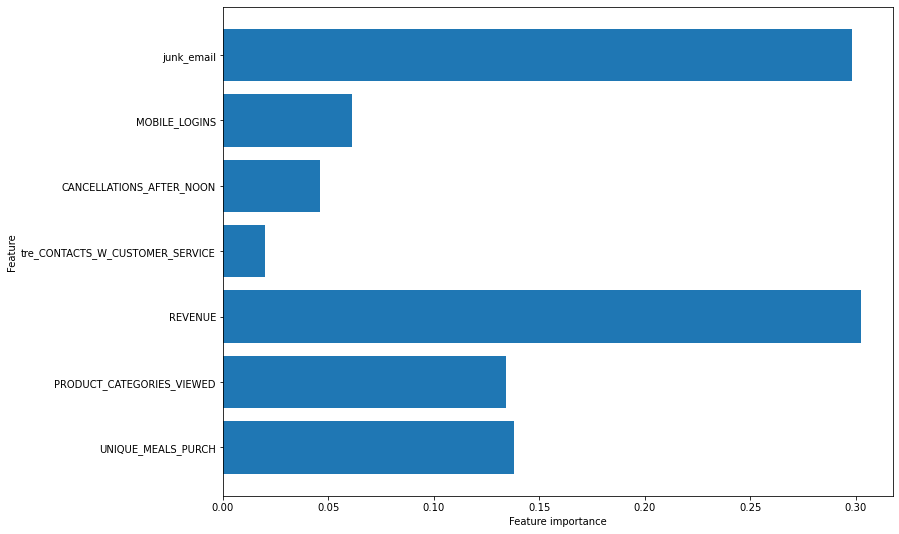

In [12]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [13]:
###############################
# gradient boosted models (GBM)
###############################

# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 7,
                                              warm_start    = False,
                                              random_state  = 219)


# FITTING the model
full_gbm_default_fit = full_gbm_default.fit(chef_data, chef_target)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = full_gbm_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = full_gbm_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_gbm_default_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_gbm_default_pred).round(4)

Training ACCURACY: 0.9321
Testing ACCURACY : 0.9302
AUC Score        : 0.891


In [14]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 122
False Positives: 34
False Negatives: 0
True Positives : 331



In [15]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4)

# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)

# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Random Forest Model', 'Gradient Boosted Model - *Final Best Model*'],
           
    'AUC Score' : [rf_default_fit_auc_score, full_gbm_default_auc_score],
    
    'Training Accuracy' : [rf_default_train_score, gbm_train_acc],
           
    'Testing Accuracy'  : [rf_default_test_score, gbm_test_acc],

    'Confusion Matrix'  : [(rf_tn, rf_fp, rf_fn, rf_tp),
                           (gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Random Forest Model,0.5927,0.7800,0.7043,"(44, 112, 32, 299)"
1,Gradient Boosted Model - *Final Best Model*,0.8910,0.9321,0.9302,"(122, 34, 0, 331)"
